### Tutorial on Lasso Regression Method
Mini-lecture given on April 23, 2024 for CS315\
Authors: Caroline Jung, Tayae Rogers\
References: [https://machinelearningmastery.com/lasso-regression-with-python/](https://machinelearningmastery.com/lasso-regression-with-python/)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

/var/folders/cw/4tmbrj3d1pzd4rhyrm8vnwyc0000gn/T/ipykernel_16534/3467607151.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# read in dataset
data = pd.read_csv("tiktok_metadata.csv")
data.columns

Index(['video_id', 'video_timestamp', 'video_duration',
       'video_locationcreated', 'suggested_words', 'video_diggcount',
       'video_sharecount', 'video_commentcount', 'video_playcount',
       'video_description', 'video_is_ad', 'video_stickers', 'author_username',
       'author_name', 'author_followercount', 'author_followingcount',
       'author_heartcount', 'author_videocount', 'author_diggcount',
       'author_verified'],
      dtype='object')

We are interested in the following columns:
* features: video_duration, video_sharecount, video_commentcount, video_is_ad, author_verified
* label: video_playcount

In [4]:
columns = ["video_playcount", "video_duration", "video_sharecount", "video_commentcount", "video_is_ad", "author_verified"]

data_clean = data.loc[:, columns]
data_clean.replace({False: 0, True: 1}, inplace=True)
print("Dimensions: ", data_clean.shape)
data_clean.dropna(axis=0, inplace=True)
print("Dimensions after dropping NAs: ", data_clean.shape)
data_clean

Dimensions:  (7663, 6)
Dimensions after dropping NAs:  (7652, 6)


/var/folders/cw/4tmbrj3d1pzd4rhyrm8vnwyc0000gn/T/ipykernel_16534/182935131.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean.replace({False: 0, True: 1}, inplace=True)


,video_playcount,video_duration,video_sharecount,video_commentcount,video_is_ad,author_verified
0,19000000.0,18.0,40100.0,11000.0,0,0
1,6589.0,8.0,1.0,2.0,0,0
2,42400.0,6.0,3.0,8.0,0,0
3,6589.0,8.0,1.0,2.0,0,0
4,42400.0,6.0,3.0,8.0,0,0
...,...,...,...,...,...,...
7658,1800000.0,77.0,18700.0,8859.0,0,0
7659,338900000.0,17.0,3921.0,0.0,1,0
7660,19600.0,13.0,6.0,21.0,0,0
7661,14600000.0,61.0,13700.0,6615.0,0,0


Now we have our cleaned dataset with specific columns of interest and no NA values (for the sake of simplicity and due to large number of rows, we chose to drop the entire row if one of our columns of interest had at least one missing value). Now, let's split them into training and test data sets with a 70-30 split:

In [5]:
# split into train and test data
train, test = train_test_split(data_clean, test_size=0.3)

x_train, y_train = train.iloc[:,1:], train.iloc[:,[1]]
x_test, y_test = test.iloc[:,1:], test.iloc[:,[1]]

In [6]:
lassoreg = Lasso(alpha=0.3)
lassoreg.fit(x_train, y_train)

# regression coefficients
coefs = pd.DataFrame(index=columns[1:], data=lassoreg.coef_)
coefs.loc["intercept"] = lassoreg.intercept_[0]
print(coefs)

                               0
video_duration      9.998696e-01
video_sharecount    1.095876e-08
video_commentcount  1.118158e-08
video_is_ad        -0.000000e+00
author_verified     0.000000e+00
intercept           3.918239e-03


Note that two of our features of interest have coefficients of 0: video_is_ad and author_verified. Our lasso regression has reduced the dimensionality of our model to only 3 features (video_duration, video_sharecount, video_commentcount) and calculated coefficient estimates

In [7]:
y_pred = lassoreg.predict(x_test)

y_test["predicted_val"] = y_pred
y_test["diff"] = y_test["video_duration"]-y_pred
y_test.rename(columns={"video_duration": "actual_val"})

/var/folders/cw/4tmbrj3d1pzd4rhyrm8vnwyc0000gn/T/ipykernel_16534/3272110601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["predicted_val"] = y_pred
/var/folders/cw/4tmbrj3d1pzd4rhyrm8vnwyc0000gn/T/ipykernel_16534/3272110601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["diff"] = y_test["video_duration"]-y_pred


,actual_val,predicted_val,diff
2085,8.0,8.004528,-0.004528
7107,15.0,15.001990,-0.001990
4305,76.0,75.995160,0.004840
3670,0.0,0.003958,-0.003958
5527,5.0,5.003283,-0.003283
...,...,...,...
3455,10.0,10.002687,-0.002687
1882,7.0,7.003031,-0.003031
3500,18.0,18.001649,-0.001649
6524,6.0,6.003241,-0.003241


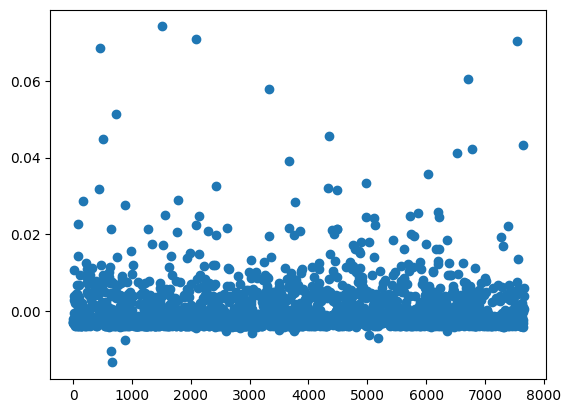

In [8]:
plt.scatter(y_test.index, y_test["diff"]) # Our predictions are pretty good on the training set
plt.show()

#### Tuning the Hyperparameter

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [10]:
model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [11]:
grid = dict()
grid['alpha'] = np.arange(0.01,1,0.01)

In [12]:
# Try it with train/test split
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error',
                      cv=cv, refit=True, n_jobs=1)
results = search.fit(x_train, y_train)

In [13]:
search.predict(x_test)

array([ 8.00015093, 15.00006635, 75.99983866, ..., 18.00005497,
        6.00010804,  5.00010921])

In [14]:
y_pred2 = search.predict(x_test)

y_test["predicted_val2"] = y_pred2
y_test["diff2"] = y_test["video_duration"]-y_pred2
y_test.rename(columns={"video_duration": "actual_val"})

/var/folders/cw/4tmbrj3d1pzd4rhyrm8vnwyc0000gn/T/ipykernel_16534/2225001569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["predicted_val2"] = y_pred2
/var/folders/cw/4tmbrj3d1pzd4rhyrm8vnwyc0000gn/T/ipykernel_16534/2225001569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["diff2"] = y_test["video_duration"]-y_pred2


,actual_val,predicted_val,diff,predicted_val2,diff2
2085,8.0,8.004528,-0.004528,8.000151,-0.000151
7107,15.0,15.001990,-0.001990,15.000066,-0.000066
4305,76.0,75.995160,0.004840,75.999839,0.000161
3670,0.0,0.003958,-0.003958,0.000132,-0.000132
5527,5.0,5.003283,-0.003283,5.000109,-0.000109
...,...,...,...,...,...
3455,10.0,10.002687,-0.002687,10.000090,-0.000090
1882,7.0,7.003031,-0.003031,7.000101,-0.000101
3500,18.0,18.001649,-0.001649,18.000055,-0.000055
6524,6.0,6.003241,-0.003241,6.000108,-0.000108


In [15]:
y_test['diff2'].describe()

count    2296.000000
mean        0.000007
std         0.000221
min        -0.000450
25%        -0.000099
50%        -0.000066
75%         0.000033
max         0.002474
Name: diff2, dtype: float64

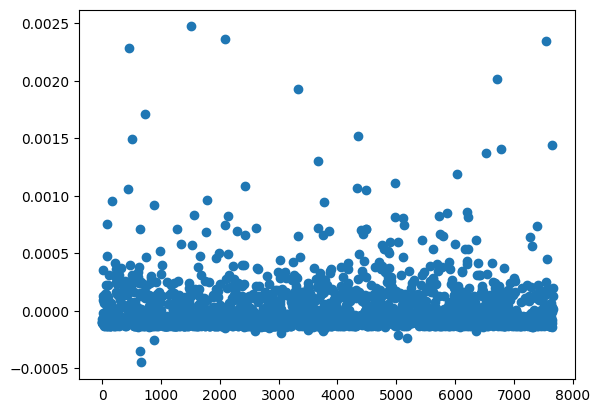

In [16]:
plt.scatter(y_test.index, y_test["diff2"]) # Our predictions are pretty good on the training set
plt.show()

In [17]:
search.best_estimator_
#search.best_score_
search.best_params_

{'alpha': 0.01}

The best hyperparameter is value $\lambda=0.01$ after tuning.

### Refit Lasso Regression model (with optimal lambda)

In [18]:
lassoreg_opt = Lasso(alpha=0.01)
lassoreg_opt.fit(x_train, y_train)

# regression coefficients for optimal model
coefs_opt = pd.DataFrame(index=columns[1:], data=lassoreg_opt.coef_)
coefs_opt.loc["intercept"] = lassoreg_opt.intercept_[0]
print(coefs_opt)

                               0
video_duration      9.999957e-01
video_sharecount    3.652921e-10
video_commentcount  3.727192e-10
video_is_ad        -0.000000e+00
author_verified     0.000000e+00
intercept           1.306080e-04
